## <font color = green|><b><p style='text-align:center'>Decission Tree Model implement on baskin robbins dataset(Ice-Cream)

In [1]:
import pandas as pd 
import seaborn as sns 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib.inline 
# % config Inline backend. figure_format = 'retina'
%config InlineBackend.figure_format = 'svg'

UsageError: Line magic function `%matplotlib.inline` not found.


In [2]:
url = 'https://github.com/sophalITC/datasci/raw/master/baskin_robbins.csv'
df = pd.read_csv(url)
df.head()

,Flavour,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g),Category
0,Bananas Foster,160,8.0,0.2,20,16,2.0,std
1,Baseball Nut,160,9.0,0.2,19,13,3.0,std
2,Beavertails Pastry,170,9.0,0.3,21,15,3.0,std
3,Blackberry Frozen Yogurt,120,4.0,0.1,17,16,3.0,std
4,Blue Raspberry Sherbet,130,2.0,0.1,26,20,2.0,light


Certainly! Here's an explanation of each feature in the provided DataFrame:

1. **Flavour**: the name or description of the ice cream flavor.

2. **Calories**: the calorie content per serving of the ice cream flavor.

3. **Total Fat (g)**: the total fat content per serving of the ice cream flavor, measured in grams.

4. **Trans Fat (g)**: the trans fat content per serving of the ice cream flavor, measured in grams. Trans fats are a type of unhealthy fat that can raise the risk of heart disease.

5. **Carbohydrates (g)**: the carbohydrate content per serving of the ice cream flavor, measured in grams. Carbohydrates are a macronutrient that provides energy to the body.

6. **Sugars (g)**: the sugar content per serving of the ice cream flavor, measured in grams. Sugars are a type of carbohydrate that add sweetness to foods.

7. **Protein (g)**: the protein content per serving of the ice cream flavor, measured in grams. Protein is a macronutrient important for various functions in the body, including muscle growth and repair.

8. **Category**: the category or type of the ice cream flavor. It may provide information about the product's characteristics or classification, such as "std" (standard) or "light" (lower calorie or fat content).

These features provide details about different aspects of the ice cream flavors, including their nutritional composition (such as calories, fats, carbohydrates, sugars, and protein) as well as their flavor names and categorization.

In [3]:
df.to_csv('dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Flavour            70 non-null     object 
 1   Calories           70 non-null     int64  
 2   Total Fat (g)      70 non-null     float64
 3   Trans Fat (g)      70 non-null     float64
 4   Carbohydrates (g)  70 non-null     int64  
 5   Sugars (g)         70 non-null     int64  
 6   Protein (g)        70 non-null     float64
 7   Category           70 non-null     object 
dtypes: float64(3), int64(3), object(2)
memory usage: 4.5+ KB


In [4]:
df.columns

Index(['Flavour', 'Calories', 'Total Fat (g)', 'Trans Fat (g)',
       'Carbohydrates (g)', 'Sugars (g)', 'Protein (g)', 'Category'],
      dtype='object')

In [5]:
numeric_feature = df.select_dtypes('number').columns
numeric_feature

Index(['Calories', 'Total Fat (g)', 'Trans Fat (g)', 'Carbohydrates (g)',
       'Sugars (g)', 'Protein (g)'],
      dtype='object')

In [6]:
category_feature = df.select_dtypes('object').columns
category_feature

Index(['Flavour', 'Category'], dtype='object')

In [7]:
for column in df.columns:
    unique_values = df[column].unique()
    unique_values.sort()  # Sort the unique values in ascending order
    print(f"Content values in {column}: {unique_values}\n")

Content values in Flavour: ['Bananas Foster' 'Baseball Nut' 'Beavertails Pastry'
 'Blackberry Frozen Yogurt' 'Blue Raspberry Sherbet'
 'Blueberry Cheesecake' 'Brownie Sundae(No Sugar Added)'
 'Caramel Praline Cheesecake' 'Cherries Jubilee' 'Chocoholic’s Resolution'
 'Chocolate' 'Chocolate Chip' 'Chocolate Chip Cookie Dough'
 'Chocolate Fudge' 'Chocolate Hazelnut Truffle' 'Chocolate Mousse Royale'
 'Citrus Twist Ice' 'Cookies ‘n Cake' 'Cookies ‘n Cream' 'Cotton Candy'
 'Easter Egg Hunt' 'French Vanilla' 'Fudge Brownie'
 'German Chocolate Cake' 'Gold Medal Ribbon' 'Green Tea'
 'Icing on the Cake' 'Jamoca Almond Fudge' 'Love Potion #31'
 'Lunar Cheesecake' 'Made with Snickers' 'Mango Mania' 'Mango Sorbet'
 'Mango Tango' 'Maple Walnut' 'Maui Brownie Madness' 'Mint Chocolate Chip'
 'Mom’s Makin Cookies' 'NF Vanilla Yogurt' 'NSA Caramel Turtle Truffle'
 'NSA Pineapple Coconut' 'Nutty Coconut' 'Old Fashioned Butter Pecan'
 'Peanut Butter ‘n Banana' 'Peanut Butter ‘n Chocolate'
 'Peanut Butter

In [8]:
df.describe()

,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g)
count,70.000000,70.000000,70.000000,70.0000,70.000000,70.000000
mean,191.714286,10.562857,0.277143,22.9000,16.914286,3.567143
std,61.643468,7.947275,0.145633,5.4511,4.497158,1.679175
min,70.000000,0.000000,0.000000,13.0000,4.000000,0.000000
25%,152.500000,7.250000,0.200000,18.0000,14.000000,3.000000
50%,180.000000,10.000000,0.300000,21.0000,17.000000,3.500000
75%,240.000000,13.750000,0.400000,27.0000,20.000000,5.000000
max,330.000000,60.000000,0.500000,38.0000,28.000000,8.000000


In [10]:
cols = ['Calories','Total Fat (g)','Trans Fat (g)','Carbohydrates (g)','Sugars (g)','Protein (g)']
cols

['Calories',
 'Total Fat (g)',
 'Trans Fat (g)',
 'Carbohydrates (g)',
 'Sugars (g)',
 'Protein (g)']

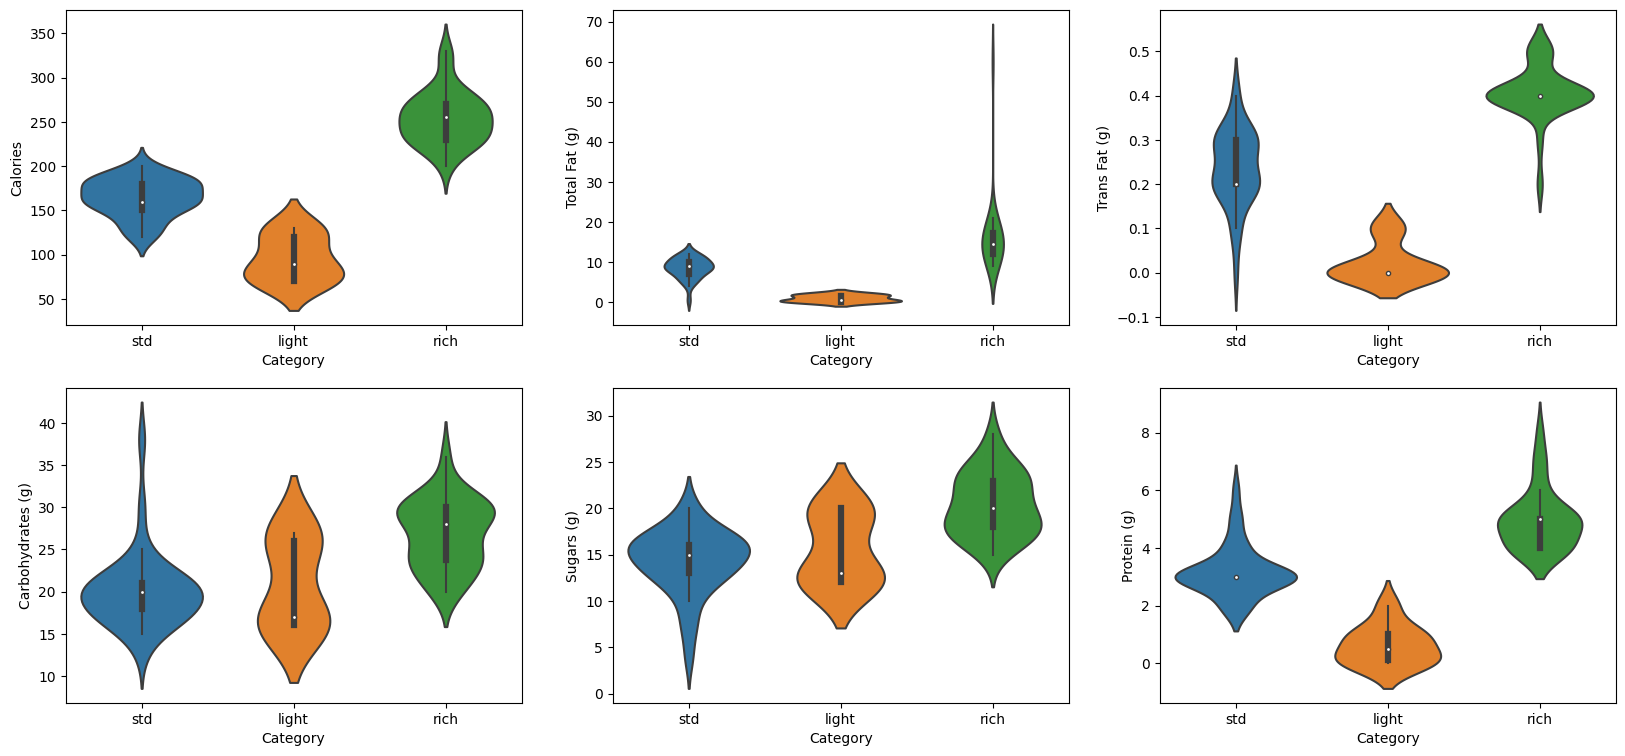

In [11]:
fig,ax = plt.subplots(nrows=2,ncols=3,figsize=(20,9))
ax = ax.ravel()
for i, col in enumerate(cols):
    sns.violinplot(x='Category',y=col,data=df,ax=ax[i])

### <font color = green|><b>1.1.) Draw Decission Tree

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import(
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
    precision_recall_fscore_support,
    f1_score,
);

In [12]:
df.columns

Index(['Flavour', 'Calories', 'Total Fat (g)', 'Trans Fat (g)',
       'Carbohydrates (g)', 'Sugars (g)', 'Protein (g)', 'Category'],
      dtype='object')

In [13]:
cols

['Calories',
 'Total Fat (g)',
 'Trans Fat (g)',
 'Carbohydrates (g)',
 'Sugars (g)',
 'Protein (g)']

In [14]:
x = df[cols] # features
y = df['Category'] # label of protein categories

In [16]:
test_size = 0.2  # mean that test_size = 20% of dataset 
x_train,x_test,y_train,y_test = train_test_split(
    x,y,test_size=test_size,stratify=y,random_state=7 # we choose 7 random samples from dataset to modify and break into train set and test set 
)

In [17]:
model = DecisionTreeClassifier(criterion='gini') # gini is a default 
# model = DecisionTreeClassifier(criterion='entropy')
model.fit(X=x_train,y=y_train)

DecisionTreeClassifier()

In [18]:
x_train.columns

Index(['Calories', 'Total Fat (g)', 'Trans Fat (g)', 'Carbohydrates (g)',
       'Sugars (g)', 'Protein (g)'],
      dtype='object')

In [19]:
model.feature_importances_

array([0.62367944, 0.31901352, 0.        , 0.        , 0.05730704,
       0.        ])

In [20]:
fs = pd.Series(model.feature_importances_,index=x_train.columns).sort_values(ascending=False)
fs

Calories             0.623679
Total Fat (g)        0.319014
Sugars (g)           0.057307
Trans Fat (g)        0.000000
Carbohydrates (g)    0.000000
Protein (g)          0.000000
dtype: float64

```
We observed that there exist 3 importance features involving such as: df['Categories'] , df['Total Fat (g)'] , df['Sugars (g)']  
```

In [21]:
y_train.value_counts()

std      26
rich     23
light     7
Name: Category, dtype: int64

### <font color = green|><b>Tree Diagram (better way)

In [23]:
clf = DecisionTreeClassifier(criterion='gini')
clf.fit(X=x_train,y=y_train)

DecisionTreeClassifier()

In [23]:
clf.__dict__

{'criterion': 'gini',
 'splitter': 'best',
 'max_depth': None,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': None,
 'max_leaf_nodes': None,
 'random_state': None,
 'min_impurity_decrease': 0.0,
 'class_weight': None,
 'ccp_alpha': 0.0,
 'feature_names_in_': array(['Calories', 'Total Fat (g)', 'Trans Fat (g)', 'Carbohydrates (g)',
        'Sugars (g)', 'Protein (g)'], dtype=object),
 'n_features_in_': 6,
 'n_outputs_': 1,
 'classes_': array(['light', 'rich', 'std'], dtype=object),
 'n_classes_': 3,
 'max_features_': 6,
 'tree_': <sklearn.tree._tree.Tree at 0x1fc35ca5c00>}

In [24]:
clf.__dict__['tree_']

In [25]:
type(clf)

sklearn.tree._classes.DecisionTreeClassifier

In [26]:
clf.__dict__['classes_']

array(['light', 'rich', 'std'], dtype=object)

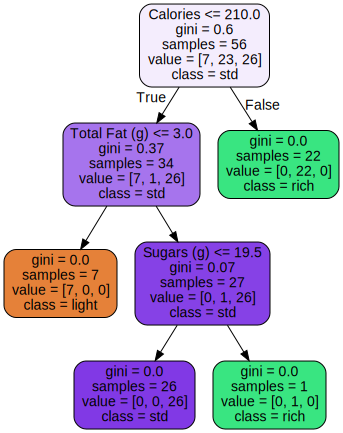

In [27]:
from sklearn.tree import export_graphviz
from graphviz import Digraph, Source

def view_tree(model,x,save_tree_img=False):
    estimators = clf 
    dot_graph = export_graphviz(
        estimators,
        feature_names=x.columns,
        class_names = model.__dict__['classes_'],
        rounded=True,
        proportion=False,
        precision=2,
        filled=True,
    )
    
#  with open(f'tree{tree_index}.dot') as f: 
#       dot_graph = f.read()
        
    g = Source(dot_graph)
    if save_tree_img:
        g.render(f'tree',format='png',view=False,cleanup=True)
        
    return g 

view_tree(clf,x_test,save_tree_img=False)

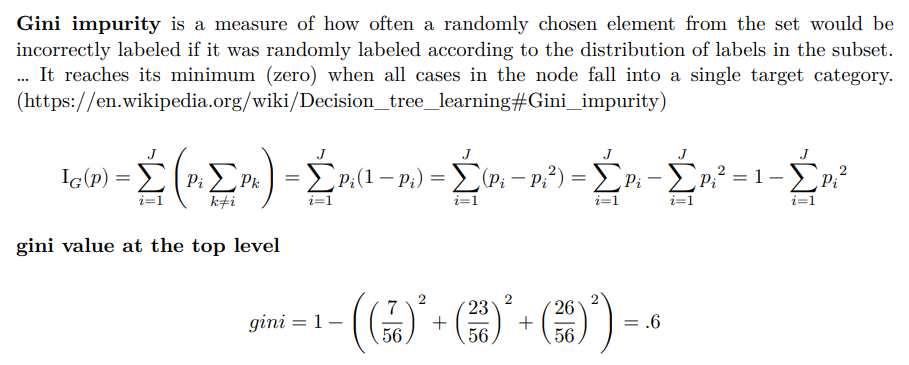

[Text(0.6, 0.875, 'X[0] <= 210.0\ngini = 0.6\nsamples = 56\nvalue = [7, 23, 26]'),
 Text(0.4, 0.625, 'X[1] <= 3.0\ngini = 0.372\nsamples = 34\nvalue = [7, 1, 26]'),
 Text(0.2, 0.375, 'gini = 0.0\nsamples = 7\nvalue = [7, 0, 0]'),
 Text(0.6, 0.375, 'X[4] <= 19.5\ngini = 0.071\nsamples = 27\nvalue = [0, 1, 26]'),
 Text(0.4, 0.125, 'gini = 0.0\nsamples = 26\nvalue = [0, 0, 26]'),
 Text(0.8, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.8, 0.625, 'gini = 0.0\nsamples = 22\nvalue = [0, 22, 0]')]

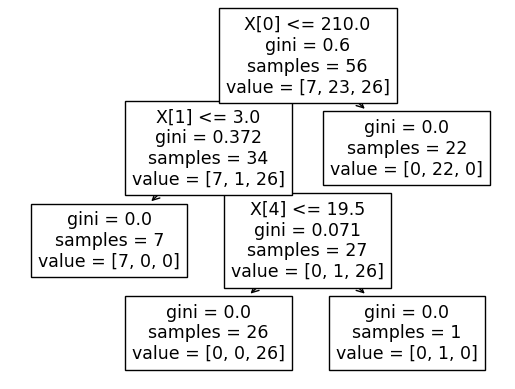

In [29]:
from sklearn import tree 
tree.plot_tree(clf) 

```
Confusion matrix represent the result after applying model tree on y_test set
```

In [31]:
cm = confusion_matrix(y_test,model.predict(X=x_test))
cm

array([[2, 0, 0],
       [0, 5, 0],
       [1, 1, 5]], dtype=int64)

In [33]:
print(classification_report(y,model.predict(x)))

              precision    recall  f1-score   support

       light       0.90      1.00      0.95         9
        rich       0.97      1.00      0.98        28
         std       1.00      0.94      0.97        33

    accuracy                           0.97        70
   macro avg       0.96      0.98      0.97        70
weighted avg       0.97      0.97      0.97        70



- Precision: Precision measures how well the model correctly predicts instances of a specific class. The model achieved high precision for all classes, ranging from 0.90 to 1.00. This indicates that the model accurately predicted the instances for each class.

- Recall: Recall, also known as sensitivity, measures how well the model captures instances of a specific class. The model achieved a recall of 1.00 for the "light" and "rich" classes, indicating it correctly captured all instances of these classes. The recall for the "std" class was 0.94, indicating that the model missed a few instances of this class.

- F1-score: The F1-score is a balance between precision and recall, providing an overall measure of the model's performance for each class. The F1-scores ranged from 0.95 to 0.98, indicating that the model achieved high accuracy in predicting instances for all classes.

- Support: The support column indicates the number of instances for each class in the dataset. It shows that the dataset is imbalanced, with varying numbers of instances for each class.

- Accuracy: The overall accuracy of the model is 0.97, indicating that it correctly predicted 97% of the instances in the dataset.

- Macro avg: The macro average provides an overall summary of the model's performance across all classes, giving equal weight to each class. The macro average precision, recall, and F1-score were all high, indicating strong overall performance.

- Weighted avg: The weighted average takes into account the support of each class, providing a measure that considers the class imbalance. The weighted average precision, recall, and F1-score were all 0.97, indicating a strong overall performance, considering the varying number of instances for each class.

```
In summary, the classification report suggests that the model performed well, achieving high precision, recall, and F1-scores for all classes. The accuracy and macro-average F1-score of 0.97 indicate the model's effectiveness in predicting the classes in the dataset, while the support column highlights the class imbalance in the data.
```

In [34]:
model.tree_.impurity # gins

array([0.60012755, 0.37197232, 0.        , 0.07133059, 0.        ,
       0.        , 0.        ])

In [35]:
model.tree_.value

array([[[ 7., 23., 26.]],

       [[ 7.,  1., 26.]],

       [[ 7.,  0.,  0.]],

       [[ 0.,  1., 26.]],

       [[ 0.,  0., 26.]],

       [[ 0.,  1.,  0.]],

       [[ 0., 22.,  0.]]])

In [36]:
# this import registers the 3D project but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D
# switch to interactive matplotlib
# %matplotlib qt 
# %pylab qt 

# switch back to inline mode 
%matplotlib inline 

### <font color = green|><b>3D Scatter plot

Text(0.5, 0, 'Sugars (g)')

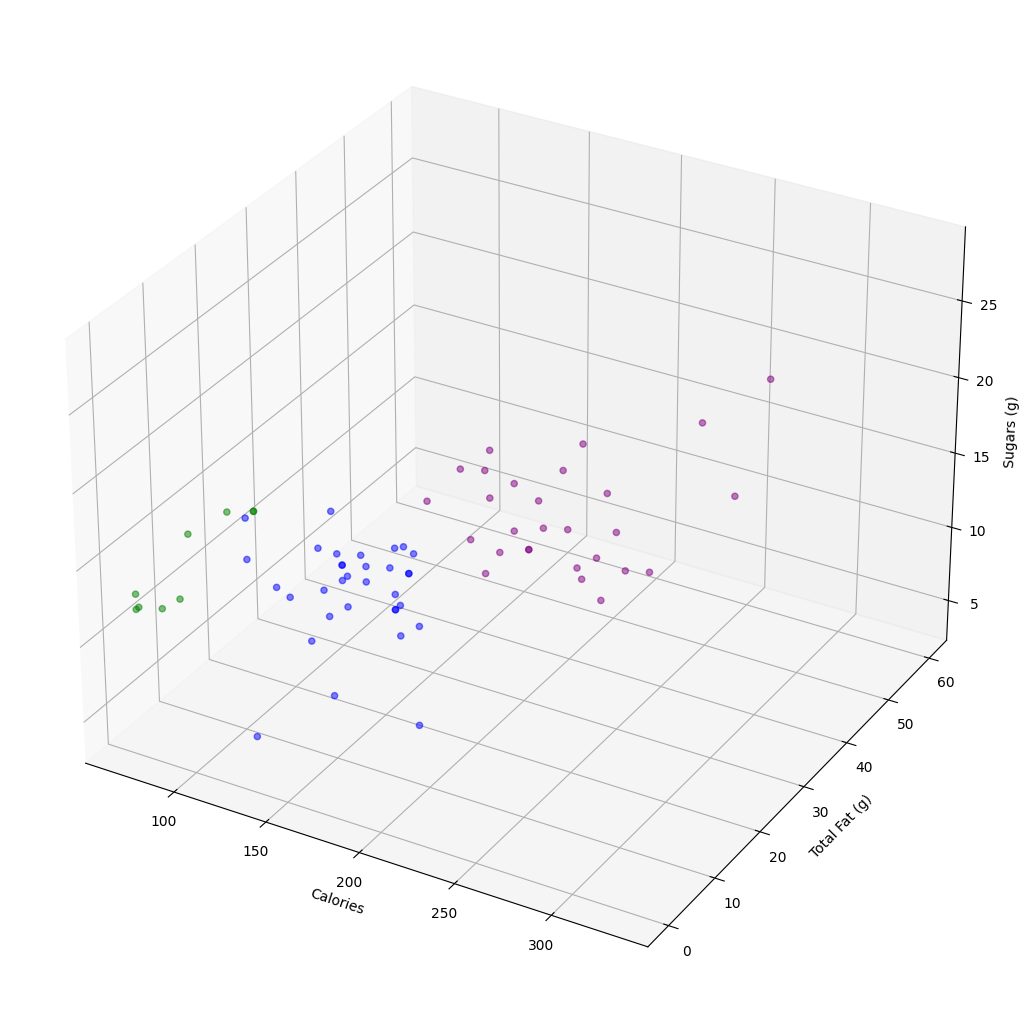

In [41]:
fig = plt.figure(figsize=(13,13))
ax = fig.add_subplot(111,projection='3d')
colors = y.map({'light':'green','std':'blue','rich':'purple'})
ax.scatter(x['Calories'],x['Total Fat (g)'],x['Sugars (g)'],alpha=0.5,c=colors)
ax.set_xlabel('Calories')
ax.set_ylabel('Total Fat (g)')
ax.set_zlabel('Sugars (g)')

# <p style='text-align:center'><b><font color = green|>The End